<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

## Step 1 : Extract Data

In [2]:
!unzip /Users/julie/Desktop/repos/DS-Unit-4-Sprint-1-NLP/module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip

Archive:  /Users/julie/Desktop/repos/DS-Unit-4-Sprint-1-NLP/module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip
  inflating: Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv  
   creating: __MACOSX/
  inflating: __MACOSX/._Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv  


In [6]:
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

In [7]:
import pandas as pd
df = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


## Step 2: Tokenizer, remove stopwords, lower case all text

In [8]:
def tokenize(text):
    "Complete this function"
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    return [token for token in simple_preprocess(text) if not token in STOPWORDS]

In [9]:
df['tokens'] = df['reviews.text'].apply(tokenize)

In [10]:
df[['reviews.text', 'tokens']][:10]

,reviews.text,tokens
0,I order 3 of them and one of the item is bad q...,"[order, item, bad, quality, missing, backup, s..."
1,Bulk is always the less expensive way to go fo...,"[bulk, expensive, way, products, like]"
2,Well they are not Duracell but for the price i...,"[duracell, price, happy]"
3,Seem to work as well as name brand batteries a...,"[work, brand, batteries, better, price]"
4,These batteries are very long lasting the pric...,"[batteries, long, lasting, price, great]"
5,Bought a lot of batteries for Christmas and th...,"[bought, lot, batteries, christmas, amazonbasi..."
6,ive not had any problame with these batteries ...,"[ive, problame, batteries, ordered, past, plea..."
7,Well if you are looking for cheap non-recharge...,"[looking, cheap, non, rechargeable, batteries,..."
8,These do not hold the amount of high power jui...,"[hold, high, power, juice, like, energizer, du..."
9,AmazonBasics AA AAA batteries have done well b...,"[amazonbasics, aa, aaa, batteries, appear, goo..."


In [11]:
df.shape

(28332, 25)

In [12]:
data = df['tokens']

In [13]:
data[:10]

0    [order, item, bad, quality, missing, backup, s...
1               [bulk, expensive, way, products, like]
2                             [duracell, price, happy]
3              [work, brand, batteries, better, price]
4             [batteries, long, lasting, price, great]
5    [bought, lot, batteries, christmas, amazonbasi...
6    [ive, problame, batteries, ordered, past, plea...
7    [looking, cheap, non, rechargeable, batteries,...
8    [hold, high, power, juice, like, energizer, du...
9    [amazonbasics, aa, aaa, batteries, appear, goo...
Name: tokens, dtype: object

## Step 3: Stemming using Snowball stemmer

In [14]:
from nltk.stem.snowball import SnowballStemmer
sb_stemmer = SnowballStemmer('english')
stemmed_tokens = []
for sent in data:
    tokens = [sb_stemmer.stem(token) for token in sent]
    stemmed_tokens.append(tokens)
print(stemmed_tokens[:10])

[['order', 'item', 'bad', 'qualiti', 'miss', 'backup', 'spring', 'pcs', 'aluminum', 'batteri', 'work'], ['bulk', 'expens', 'way', 'product', 'like'], ['duracel', 'price', 'happi'], ['work', 'brand', 'batteri', 'better', 'price'], ['batteri', 'long', 'last', 'price', 'great'], ['bought', 'lot', 'batteri', 'christma', 'amazonbas', 'cell', 'good', 'haven', 'notic', 'differ', 'brand', 'batteri', 'amazon', 'basic', 'brand', 'lot', 'easier', 'purchas', 'arriv', 'hous', 'hand', 'buy'], ['ive', 'problam', 'batteri', 'order', 'past', 'pleas'], ['look', 'cheap', 'non', 'recharg', 'batteri', 'perfect'], ['hold', 'high', 'power', 'juic', 'like', 'energ', 'duracel', 'half', 'price'], ['amazonbas', 'aa', 'aaa', 'batteri', 'appear', 'good', 'shelf', 'life', 'll', 'buy']]


## Step 4: Create a dictonary using corpora

In [15]:
texts_dictionary = corpora.Dictionary(stemmed_tokens)

print(texts_dictionary)

Dictionary(6511 unique tokens: ['aluminum', 'backup', 'bad', 'batteri', 'item']...)


In [16]:
# use the token2id method，assess the mapping between words and their's ids.
import operator
print("IDs 1 through 10: {}".format(sorted(texts_dictionary.token2id.items(), key=operator.itemgetter(1), reverse = False)[:10]))

IDs 1 through 10: [('aluminum', 0), ('backup', 1), ('bad', 2), ('batteri', 3), ('item', 4), ('miss', 5), ('order', 6), ('pcs', 7), ('qualiti', 8), ('spring', 9)]


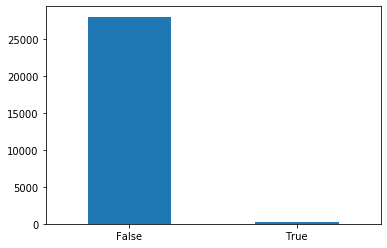

In [17]:
#How many reviews have word 'complaint' in it
complaints = df['reviews.text'].str.contains("complaint").value_counts()
ax = complaints.plot.bar(rot=0)

## Step 5: Converting the dictionary to bag of words, get corpus


In [42]:
corpus = [texts_dictionary.doc2bow(text) for text in data]
len(corpus)

28332

In [43]:
corpus[:10]

[[(0, 1), (1, 1), (2, 1), (4, 1), (6, 1), (7, 1), (9, 1), (10, 1)],
 [(11, 1), (13, 1), (15, 1)],
 [(18, 1)],
 [(10, 1), (18, 1), (19, 1), (20, 1)],
 [(18, 1), (21, 1), (23, 1)],
 [(20, 2),
  (24, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (38, 2)],
 [(41, 1), (42, 1)],
 [(45, 1), (47, 1), (48, 1)],
 [(13, 1), (18, 1), (51, 1), (52, 1), (53, 1), (55, 1)],
 [(29, 1), (34, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1)]]

## Step 6: Fit LDA model

In [20]:
lda = LdaMulticore(corpus=corpus,
                   id2word=texts_dictionary,
                   random_state=723812,
                   num_topics = 15,
                   passes=10,
                   workers=8
                  )

In [21]:
lda.print_topics()

[(0,
  '0.072*"size" + 0.069*"tablet" + 0.059*"use" + 0.057*"great" + 0.049*"screen" + 0.042*"perfect" + 0.039*"nice" + 0.026*"love" + 0.020*"kid" + 0.019*"right"'),
 (1,
  '0.296*"great" + 0.221*"price" + 0.028*"tablet" + 0.027*"beat" + 0.027*"buy" + 0.024*"deal" + 0.021*"product" + 0.015*"long" + 0.014*"gift" + 0.013*"best"'),
 (2,
  '0.051*"screen" + 0.047*"better" + 0.018*"need" + 0.016*"like" + 0.015*"amazon" + 0.015*"new" + 0.013*"laptop" + 0.012*"bigger" + 0.012*"version" + 0.011*"model"'),
 (3,
  '0.090*"tablet" + 0.071*"amazon" + 0.027*"bought" + 0.024*"great" + 0.024*"use" + 0.022*"prime" + 0.020*"play" + 0.017*"hd" + 0.013*"netflix" + 0.013*"ipad"'),
 (4,
  '0.061*"amazon" + 0.050*"brand" + 0.028*"ve" + 0.027*"long" + 0.021*"aa" + 0.019*"aaa" + 0.017*"time" + 0.017*"cost" + 0.016*"use" + 0.016*"like"'),
 (5,
  '0.078*"tablet" + 0.049*"read" + 0.035*"great" + 0.030*"reader" + 0.027*"use" + 0.021*"book" + 0.020*"love" + 0.018*"internet" + 0.016*"daughter" + 0.015*"ok"'),
 (6,


In [22]:
lda.show_topics(num_topics=5,num_words=5)

[(8,
  '0.375*"good" + 0.082*"price" + 0.041*"tablet" + 0.038*"far" + 0.025*"money"'),
 (0,
  '0.072*"size" + 0.069*"tablet" + 0.059*"use" + 0.057*"great" + 0.049*"screen"'),
 (5,
  '0.078*"tablet" + 0.049*"read" + 0.035*"great" + 0.030*"reader" + 0.027*"use"'),
 (3,
  '0.090*"tablet" + 0.071*"amazon" + 0.027*"bought" + 0.024*"great" + 0.024*"use"'),
 (4,
  '0.061*"amazon" + 0.050*"brand" + 0.028*"ve" + 0.027*"long" + 0.021*"aa"')]

In [23]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [24]:
topics = [' '.join(t[0:5]) for t in words]

In [35]:
topics

['size tablet use great screen',
 'great price tablet beat buy',
 'screen better need like amazon',
 'tablet amazon bought great use',
 'amazon brand ve long aa',
 'tablet read great reader use',
 'great product like recommend tablet',
 'buy best time use great',
 'good price tablet far money',
 'time amazon alexa music sound',
 'use set tablet product like',
 'work great fine cheap long',
 'fast ipad tablet like great',
 'long great time read light',
 'love old bought tablet year']

In [25]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
size tablet use great screen

------ Topic 1 ------
great price tablet beat buy

------ Topic 2 ------
screen better need like amazon

------ Topic 3 ------
tablet amazon bought great use

------ Topic 4 ------
amazon brand ve long aa

------ Topic 5 ------
tablet read great reader use

------ Topic 6 ------
great product like recommend tablet

------ Topic 7 ------
buy best time use great

------ Topic 8 ------
good price tablet far money

------ Topic 9 ------
time amazon alexa music sound

------ Topic 10 ------
use set tablet product like

------ Topic 11 ------
work great fine cheap long

------ Topic 12 ------
fast ipad tablet like great

------ Topic 13 ------
long great time read light

------ Topic 14 ------
love old bought tablet year



In [29]:
lda[corpus[0]]

[(11, 0.89618725)]

In [30]:
distro = [lda[d] for d in corpus]

In [31]:
distro[0]

[(11, 0.89618725)]

In [32]:
distro = [lda[d] for d in corpus]

def update(doc):
        d_dist = {k:0 for k in range(0,15)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [33]:
len(new_distro)

28332

In [34]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,tokens
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...","[order, item, bad, quality, missing, backup, s..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...","[bulk, expensive, way, products, like]"
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...","[duracell, price, happy]"
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...","[work, brand, batteries, better, price]"
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...","[batteries, long, lasting, price, great]"


In [37]:
df = pd.DataFrame.from_records(new_distro)
df.columns = topics


In [38]:
df.head()

,size tablet use great screen,great price tablet beat buy,screen better need like amazon,tablet amazon bought great use,amazon brand ve long aa,tablet read great reader use,great product like recommend tablet,buy best time use great,good price tablet far money,time amazon alexa music sound,use set tablet product like,work great fine cheap long,fast ipad tablet like great,long great time read light,love old bought tablet year
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.896187,0.000000,0.000000,0.000000
1,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.766664,0.016667,0.016667,0.016667
2,0.033333,0.533333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
3,0.013333,0.013334,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.813332,0.013333,0.013333,0.013333
4,0.016667,0.766666,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667


In [39]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [45]:
# Can take a long time to run.
coherence_values = compute_coherence_values(dictionary=texts_dictionary, 
                                                        corpus=corpus,
                                                        start=2, 
                                                        limit=40, 
                                                        step=6,
                                                        passes=10)

In [46]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

In [70]:
topic_coherence.sort_values("num_topics").head(20)

,coherence_score,num_topics,pass
0,-2.634333,2,0
21,-2.623912,2,3
28,-2.620699,2,4
56,-2.651378,2,8
35,-2.657047,2,5
7,-2.632309,2,1
49,-2.716396,2,7
14,-2.653948,2,2
63,-2.645378,2,9
42,-2.604965,2,6


/Users/julie/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


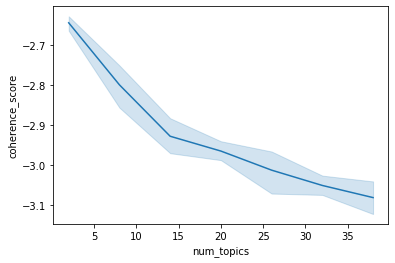

In [48]:
import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

In [69]:
limit=40; start=2; step=6;
x = range(start, limit, step)

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

TypeError: type dict doesn't define __round__ method

In [51]:
lda[texts_dictionary.doc2bow(tokenize("This is a sample document to score with a topic distribution."))]

[(0, 0.016717833),
 (1, 0.016717833),
 (2, 0.016717868),
 (3, 0.016717888),
 (4, 0.016717833),
 (5, 0.016717833),
 (6, 0.016717833),
 (7, 0.49997768),
 (8, 0.016717833),
 (9, 0.016717833),
 (10, 0.01671792),
 (11, 0.28269032),
 (12, 0.016717833),
 (13, 0.016717833),
 (14, 0.016717833)]

In [52]:
import pyLDAvis.gensim # To visualise LDA model effectively

In [53]:
lda_display = pyLDAvis.gensim.prepare(lda, corpus, texts_dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/Users/julie/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [54]:
# Compute Perplexity
print('\nPerplexity: ', lda.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


Perplexity:  -6.130588719848048


## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling